# Credit card fraud detection

# Import the Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import random

%matplotlib inline

random.seed(123) #making the results reproducible


# Import The DATASET

filename = 'creditcard.csv'
original_data = pd.read_csv(filename)
data = original_data.copy() # create a copy for use leave the original in case we need it later.

In [2]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

1 - Logistic Regression Model

1.1 - First Look at the Data

The data has 28 anonymised features, V1 to V28, which also appear to have been normalised. In addition, there is the time and the transaction amount, giving us 30 features in total.

For now, I am going to ignore the time feature. I will also normalise the Amount and add this as a new column.

In [10]:
amounts = data.loc[:, ['Amount']]
data['Amount'] = StandardScaler().fit_transform(amounts)

data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  0.244964      0  
1  0.167170  0.125895 -0.008983  0.014724 -0.342475      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  1.160686      0  
3  0.647376 -0.221929  0.062723  0.061458  0.140534      0  
4 -0.206010  0.502292  0.219422  0.215153 -0.073403      0  

[5 rows x 31 columns]

Now we can drop the Time column to remove it

In [12]:
data = data.drop(columns=['Time'])
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...         V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...   -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ...   -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...    0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ...   -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...   -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403      0  

[5 rows x 30 columns]

In [13]:
class_dist = pd.value_counts(data['Class'], sort = True)


In [14]:
class_dist

0    284315
1       492
Name: Class, dtype: int64

In [15]:
print('%.2f%% of transactions are fraudulent.' % (class_dist[1]/sum(class_dist)*100) )

0.17% of transactions are fraudulent.


These data are highly skewed, which means that ordinary error metrics will not provide useful insight for our classifier.

For example, if we had a classifier that simply predicts that classes every transaction as non fraudulent (class 0), then it would be correct 99.83% of the time!

We need a better method of measuring the algorithm's error. In this case we should use recall and precision to evaluate the effectiveness of the algorithm.

In addition we need to take care when we separate our data into training, cross validation and test sets. There is a good chance we may have no fraudulent examples in one of these sets, which we want to avoid.

So first, we split our fraudulent examples (class 1) and our non-fraudulent examples (class 0).

In [16]:
class_1 = data[data.Class == 1]
class_0 = data[data.Class == 0]

In [17]:
print(class_0.shape)
print(class_1.shape)

(284315, 30)
(492, 30)


1.2 - Creating training, cross-validation and test data sets

The data have been split into fraudulent and non-fraudulent data. Now, let's create different data sets with the following split:

70% training data

15% cross-validation data

15% test data

So for our two classes these are approximately:

In [18]:
class_0_split = [round(x * class_0.shape[0]) for x in [0.7, 0.15, 0.15]]
class_1_split = [round(x * class_1.shape[0]) for x in [0.7, 0.15, 0.15]]

print('Non-fraudulent data split %s' % class_0_split)
print('Fraudulent data split %s' % class_1_split)

print('\nCheck for rounding issues as we want to avoid increasing the total with rounding up: ')
print(sum(class_0_split) / class_0.shape[0])
print(sum(class_1_split) / class_1.shape[0])

Non-fraudulent data split [199020, 42647, 42647]
Fraudulent data split [344, 74, 74]

Check for rounding issues as we want to avoid increasing the total with rounding up: 
0.9999964827743876
1.0


This gives us the required split of fraudulent and non-frudulent data.

Since we have very skewed data, one method that can be used to create a useful classifier is to resample the data and to reduce the presence of the over-represented class in our training data.

To do this, let's create a training data set with 50:50 split between fraudulent and non-fraudulent training data. So we will only have 344 non-fraudulent examples in our training set instead of the prescribed 199,020 above

In [19]:
class_0_train = class_0.sample(n = 344, random_state = 123,  replace = False) #make our random state reproducible
class_1_train = class_1.sample(n = 344, random_state = 234,  replace = False)

For the cross-validation, and test samples, we will maintain the normal skewness of the original data.

We have to take care here not to re-sample the trianing data (or the cross-validation data for the test data), so we use drop to remove these examples before sampling again.

We also have too much extra data from undersampling the training data, so we have to reduce the amount in the final test data to keep to ratio of fraudulent and non-fraudulent data.

In [20]:
class_0_cv = class_0.drop(class_0_train.index).sample(n = 42647, random_state = 345,  replace = False)
class_0_test = class_0.drop(class_0_train.index).drop(class_0_cv.index).sample(n = 42647, random_state = 456,  replace = False)

class_1_cv = class_1.drop(class_1_train.index).sample(n = 74, random_state = 567, replace = False)
class_1_test = class_1.drop(class_1_train.index).drop(class_1_cv.index)

Now, let's re-merge the data into three sets.

In [21]:
train_set = pd.concat([class_0_train, class_1_train])
cv_set = pd.concat([class_0_cv, class_1_cv])
test_set = pd.concat([class_0_test, class_1_test])

In [22]:
#train_set.to_csv('training.csv')
#cv_set.to_csv('cv.csv')
#test_set.to_csv('test.csv')

These datasets were examined in Excel and no duplicates were found.

1.3 - Training the data with logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

X_train = train_set.iloc[:, 0:29]
y_train = train_set.iloc[:, 29]

lr = LogisticRegression(penalty= 'l1', C=1) # default regularisation value for now.

lr.fit(X_train, y_train)

C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
lr.score(X_train, y_train)

0.9476744186046512

In [25]:
X_cv = cv_set.iloc[:, 0:29]
y_cv = cv_set.iloc[:, 29]

In [26]:
print(lr.score(X_cv, y_cv))

0.9699211160787434


This looks good, but remember our cross-validation data is highly skewed!

We need to look at the recall and precsision to have a true understanding of this data.

Let's add the predicted classes to our cross-validation data so that we can compare it with the actual class and see where we have false/true positives and negatives.

In [27]:
y_cv_predict = lr.predict(X_cv)

cv_set['Predicted'] = y_cv_predict

cv_set.head()

V1        V2        V3        V4        V5        V6        V7  \
3987   -1.297110 -0.057703  3.047503  1.637176  0.026683  0.202114 -0.111805   
115633  1.308991 -1.138577  1.430385 -0.482580 -1.484365  1.317131 -1.761171   
230481  2.108906 -0.036505 -1.729322 -0.006799  0.594977 -0.414454  0.167962   
235426 -0.638292  2.766026 -1.057786  4.727968  0.844824 -0.370389  0.643482   
73698  -2.112259  2.286690 -0.908808 -1.098490  1.810721  5.088222 -3.061319   

              V8        V9       V10    ...           V22       V23       V24  \
3987   -0.024166  1.572831 -0.558269    ...      0.204065  0.200646  0.338350   
115633  0.435113  0.471812  0.426833    ...      0.037886 -0.167454 -0.718602   
230481 -0.220672  0.330188  0.170454    ...      0.833535 -0.151937 -1.046125   
235426  0.038886 -0.843910  2.273033    ...     -1.051073  0.230131 -0.333465   
73698  -7.198036 -0.314554 -0.636114    ...     -2.659973  0.669926  0.832128   

             V25       V26       V27       V28    Amount  Class  Predicted  
3987    0.133020 -0.282279 -0.139201 -0.103163 -0.166119      0          0  
115633  0.314970  1.284701  0.042298  0.005471 -0.335318      0          0  
230481  0.400704 -0.062815 -0.021197 -0.078745 -0.349671      0          0  
235426 -0.477547  0.075817  0.817552  0.472632 -0.315647      0          1  
73698   1.633411 -0.555329  0.240174  0.223628 -0.305292      0          0  

[5 rows x 31 columns]

In [28]:
class_list = list(cv_set['Class'])
pred_list = list(cv_set['Predicted'])

def calc_prec_recall(class_list, pred_list):
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0



    for i in range(cv_set.shape[0]):
        if class_list[i] == 1:
            if pred_list[i] == 1:
                true_pos += 1
            else:
                false_neg += 1
            
        else:
            if pred_list[i] == 0:
                true_neg += 1
            else:
                false_pos += 1
            
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    return precision, recall                                            
                      
cv_prec, cv_recall = calc_prec_recall(class_list, pred_list)      

In [29]:
print('Precision = %.2f%%' % (100 * cv_prec))
print('Recall = %.2f%%' % (100 * cv_recall))

Precision = 5.11%
Recall = 93.24%


The precision is bad, but the recall is good in this case. The low precision means that we have too many false positives and the algorithm often predicts a fraudulent transaction where there isn't one! This would be fine if we wanted to be very cautious about frudulent transactions, but customers would get very frustrated having their credit card wrongly declined.

On the other hand, we have high recall, which means we don't have many false negatives. This means that we don't miss many fraudulent transactions.

We can change the trade-off by between precision and recall by adjusting the threshold of our logistic regression classifier.

We may also be underfitting or overfitting to our training data. We simply used the defulat value for C, the inverse of the regularisation strength.

Since we don't know whether we would prefer to maximise precision or recall, let's also introduce the F1 score as our metric for evaluating our cross-validation performance:

F1=2Precision×RecallPrecision+Recall
 
This is also known as the harmonic mean of the precision and recall. Implmenting this:

In [30]:
def f1_score(precision, recall):
    return (2 * precision * recall / (precision + recall))
                                     
fscore = f1_score(cv_prec, cv_recall)
print(fscore)

0.09697821503865074


1.4 - Tuning the regularisation to improve cross-validation score

Now, let's choose a range of values for our regularisation parameter, C (inverse of regularisation strength) to find the best overall F-Score

In [31]:
C_set = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]     # A set of C values to try

def logistic_test(X_train, y_train, X_cv, y_cv, C_in):
    
    lr = LogisticRegression(penalty= 'l1', C=C_in)

    lr.fit(X_train, y_train)
    
    train_score = lr.score(X_train, y_train)
    cv_score = lr.score(X_cv, y_cv)
    
    class_list = y_cv.tolist()
    pred_list = lr.predict(X_cv).tolist()
    
    cv_prec, cv_recall = calc_prec_recall(class_list, pred_list) 

    fscore = f1_score(cv_prec, cv_recall)
    
    return train_score, cv_score, fscore

training_scores = []
cv_scores = []
cv_f1 = []
best_f1_score = 0

for C in C_set:
    print('\n-----------------------------------------------------------------------')
    print('Fitting logistic regression with regularisation parameter %f' % C)
    print('-----------------------------------------------------------------------')
    a, b, c = logistic_test(X_train, y_train, X_cv, y_cv, C)    
    print('Training score = %f' % a)
    print('Cross-validation score = %f' % b)
    print('F1 score = %f' %c)
    training_scores.append(a)
    cv_scores.append(b)
    cv_f1.append(c)
    if c > best_f1_score:
        best_f1_score =c


-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.001000
-----------------------------------------------------------------------
Training score = 0.773256
Cross-validation score = 0.572669
F1 score = 0.007502

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.003000
-----------------------------------------------------------------------
Training score = 0.763081
Cross-validation score = 0.556377
F1 score = 0.007333

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.010000
-----------------------------------------------------------------------
Training score = 0.889535
Cross-validation score = 0.857634
F1 score = 0.021872

-----------------------------------------------------------------------
Fitting logistic regression with regularisation par

C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

Training score = 0.938953
Cross-validation score = 0.983193
F1 score = 0.157277

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.300000
-----------------------------------------------------------------------
Training score = 0.941860
Cross-validation score = 0.977903
F1 score = 0.125926

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 1.000000
-----------------------------------------------------------------------
Training score = 0.947674
Cross-validation score = 0.969898
F1 score = 0.096910

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 3.000000
-----------------------------------------------------------------------
Training score = 0.947674
Cross-validation score = 0.964186
F1 score = 0.082734

-------------------------------------------

C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

Training score = 0.954942
Cross-validation score = 0.960816
F1 score = 0.076159

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 100.000000
-----------------------------------------------------------------------
Training score = 0.953488
Cross-validation score = 0.960979
F1 score = 0.076454

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 300.000000
-----------------------------------------------------------------------


C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score = 0.953488
Cross-validation score = 0.961354
F1 score = 0.077138


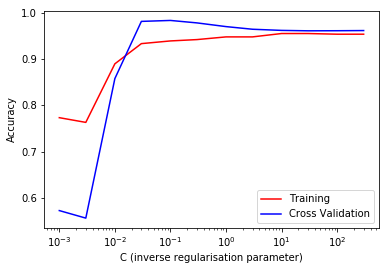

In [32]:
plt.plot(C_set, training_scores, '-r', label='Training')
plt.plot(C_set, cv_scores, '-b', label='Cross Validation')
plt.xscale('log')
plt.xlabel('C (inverse regularisation parameter)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph shows a clear under fit to our data when C is low, due to the high degree of reularisation.

On the other hand, when C is very high, there is less regularisation and the cross validation results worsen slightly. However in most cases, the accuracy for the cross-validation set is better than for the training set. This is likely due to the highly skewed nature of our Cross Validation set compared to the training set.

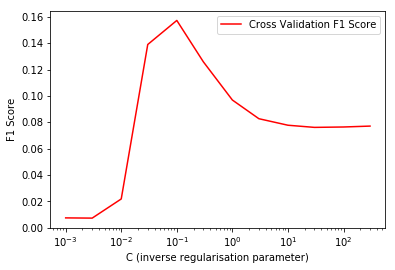

In [33]:
plt.plot(C_set, cv_f1, '-r', label='Cross Validation F1 Score')
plt.xscale('log')
plt.xlabel('C (inverse regularisation parameter)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

1.5 - Checking unseen test data

Based on our previous tuning to find the best C value via cross-validation, we can set C=0.1

It is important to note that using cross-validation data to tune our parameters is also a form of data fitting. To avoid overfitting to our cross validation set we should compare to an unseen data set. That is why we created a separate set of test data for the final result.

Let's see how the model performs on the test set.

In [34]:
lr = LogisticRegression(penalty= 'l1', C=0.1)
lr.fit(X_train, y_train)
X_test = test_set.iloc[:, 0:29]
y_test = test_set.iloc[:, 29]

class_list_test = list(test_set['Class'])
pred_list_test = lr.predict(X_test)

test_prec, test_recall = calc_prec_recall(class_list_test, pred_list_test) # pretty sure this is wrong - class list needs to be from test data
test_f1 = f1_score(test_prec, test_recall)

print('Accuracy on unseen test data: %.2f%%' % (100 * lr.score(X_test, y_test)))
print('Recall on unseen test data: %.2f%%' % (100*test_recall))
print('Precision on unseen test data: %.2f%%' % (100*test_prec))
print('F1 Score on unseen test data: %.2f%%' % (100 * test_f1))

C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on unseen test data: 98.19%
Recall on unseen test data: 93.24%
Precision on unseen test data: 8.25%
F1 Score on unseen test data: 15.16%


# Conclusion